In [23]:
import pandas as pd
import numpy as np
import torch

In [2]:
data = pd.read_csv("/home/hyun/paper/dataset/train_data_1000.csv")
data.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "y"]
data["x1"] = data["x1"].map(lambda x: x.replace("Facility1_", ""))
data["x2"] = data["x2"].map(lambda x: x.replace("Facility2_", ""))
data["x3"] = data["x3"].map(lambda x: x.replace("Facility3_", ""))
data["x4"] = data["x4"].map(lambda x: x.replace("Facility4_", ""))
data["x5"] = data["x5"].map(lambda x: x.replace("Facility5_", ""))
data["x6"] = data["x6"].map(lambda x: x.replace("Facility6_", ""))

In [24]:
data = pd.read_csv("/home/hyun/paper/dataset/test_data_125.csv")
data.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "y"]
data["x1"] = data["x1"].map(lambda x: x.replace("Facility1_", ""))
data["x2"] = data["x2"].map(lambda x: x.replace("Facility2_", ""))
data["x3"] = data["x3"].map(lambda x: x.replace("Facility3_", ""))
data["x4"] = data["x4"].map(lambda x: x.replace("Facility4_", ""))
data["x5"] = data["x5"].map(lambda x: x.replace("Facility5_", ""))
data["x6"] = data["x6"].map(lambda x: x.replace("Facility6_", ""))

In [25]:
data.to_csv("/home/hyun/paper/dataset/test_data_125.csv_v2.csv", index=False)

In [22]:
data["y"] = data["y"].map(lambda x: int(x, 2))

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> None

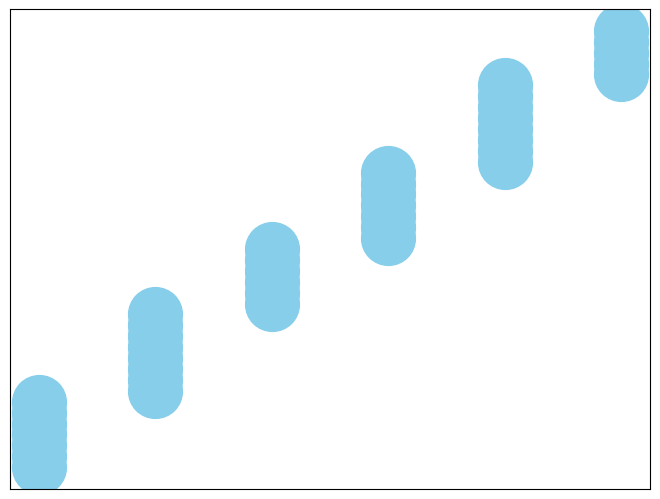

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self, id, layer, matrix):
        self.id = id
        self.layer = layer
        self.matrix = matrix

class ManufacturingProcess:
    def __init__(self):
        self.graph = nx.DiGraph()
        self.nodes = {}

    def add_node(self, node):
        self.graph.add_node(node.id, data=node)
        self.nodes[node.id] = node

    def add_edge(self, source_id, target_id):
        self.graph.add_edge(source_id, target_id)

    def get_node(self, node_id):
        return self.nodes[node_id]
    
    def get_layer(self, layer):
        return [node for node in self.nodes.values() if node.layer == layer]
    

    def visualize(self):
        pos = {}
        for node_id, node in self.nodes.items():
            pos[node_id] = (node.layer, node_id)

        nx.draw(self.graph, pos=pos, with_labels=True, node_size=1500, node_color="skyblue")
        plt.show()

# data
# process1	process2	process3	process4	process5	process6	result
# 0	Facility1_2	Facility2_5	Facility3_5	Facility4_3	Facility5_3	Facility6_5	46.13
# 1	Facility1_3	Facility2_3	Facility3_1	Facility4_6	Facility5_4	Facility6_4	47.07
# 2	Facility1_4	Facility2_4	Facility3_1	Facility4_4	Facility5_5	Facility6_5	43.81
# 3	Facility1_5	Facility2_3	Facility3_2	Facility4_1	Facility5_6	Facility6_1	50.64
# 4	Facility1_6	Facility2_2	Facility3_6	Facility4_3	Facility5_2	Facility6_3	41.45

manufacturing_process = ManufacturingProcess()

# 노드 및 엣지 추가
for layer, process_name in enumerate(data.columns[:-1]):  # 마지막 열은 결과이므로 제외
    for i, facility_id in enumerate(data[process_name]):
        # Node 생성 (임의의 matrix 값 사용)
        node = Node(id=facility_id, layer=layer, matrix=np.random.rand(2, 2))
        manufacturing_process.add_node(node)

        # Edge 생성
        if layer > 0:
            for source_node in manufacturing_process.get_layer(layer-1):
                manufacturing_process.add_edge(source_node.id, facility_id)
                


# 시각화
manufacturing_process.visualize()
        


